In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('D:/datasets/all_stocks_5yr.csv')

In [3]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
df.drop(labels='Name',axis=1)

,date,open,high,low,close,volume
0,2013-02-08,15.07,15.12,14.63,14.75,8407500
1,2013-02-11,14.89,15.01,14.26,14.46,8882000
2,2013-02-12,14.45,14.51,14.10,14.27,8126000
3,2013-02-13,14.30,14.94,14.25,14.66,10259500
4,2013-02-14,14.94,14.96,13.16,13.99,31879900
...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323


In [5]:
df.shape

(619040, 7)

In [6]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [7]:
df['open']=df['open'].fillna(value=df['open'].mean())

In [8]:
df['high']=df['high'].fillna(value=df['high'].mean())

In [9]:
df['low']=df['low'].fillna(value=df['low'].mean())

In [10]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [11]:
df.drop(labels='Name',axis=1,inplace=True)

In [12]:
df.head()

,date,open,high,low,close,volume
0,2013-02-08,15.07,15.12,14.63,14.75,8407500
1,2013-02-11,14.89,15.01,14.26,14.46,8882000
2,2013-02-12,14.45,14.51,14.10,14.27,8126000
3,2013-02-13,14.30,14.94,14.25,14.66,10259500
4,2013-02-14,14.94,14.96,13.16,13.99,31879900


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
open,619040.0,8.302333e+01,9.737790e+01,1.62,40.220,62.59,9.437000e+01,2.044000e+03
high,619040.0,8.377831e+01,9.820688e+01,1.69,40.620,63.15,9.518000e+01,2.067990e+03
low,619040.0,8.225610e+01,9.650680e+01,1.50,39.830,62.02,9.353538e+01,2.035110e+03
close,619040.0,8.304376e+01,9.738975e+01,1.59,40.245,62.62,9.441000e+01,2.049000e+03
volume,619040.0,4.321823e+06,8.693610e+06,0.00,1070320.500,2082093.50,4.284509e+06,6.182376e+08


In [14]:
import seaborn as sns

In [15]:
df.max()

date      2018-02-07
open            2044
high         2067.99
low          2035.11
close           2049
volume     618237630
dtype: object

In [16]:
%matplotlib inline

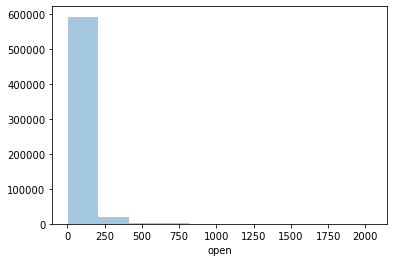

In [17]:
sns.distplot(df['open'],kde=False,bins=10,label='close')

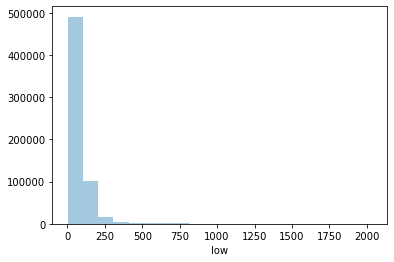

In [18]:
sns.distplot(df['low'],kde=False,bins=20)

In [19]:
df.corr()

,open,high,low,close,volume
open,1.000000,0.999939,0.999927,0.999854,-0.142705
high,0.999939,1.000000,0.999903,0.999919,-0.142315
low,0.999927,0.999903,1.000000,0.999922,-0.143239
close,0.999854,0.999919,0.999922,1.000000,-0.142802
volume,-0.142705,-0.142315,-0.143239,-0.142802,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619040 non-null  float64
 2   high    619040 non-null  float64
 3   low     619040 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 28.3+ MB


In [21]:
df['date']=pd.to_datetime(df['date'])

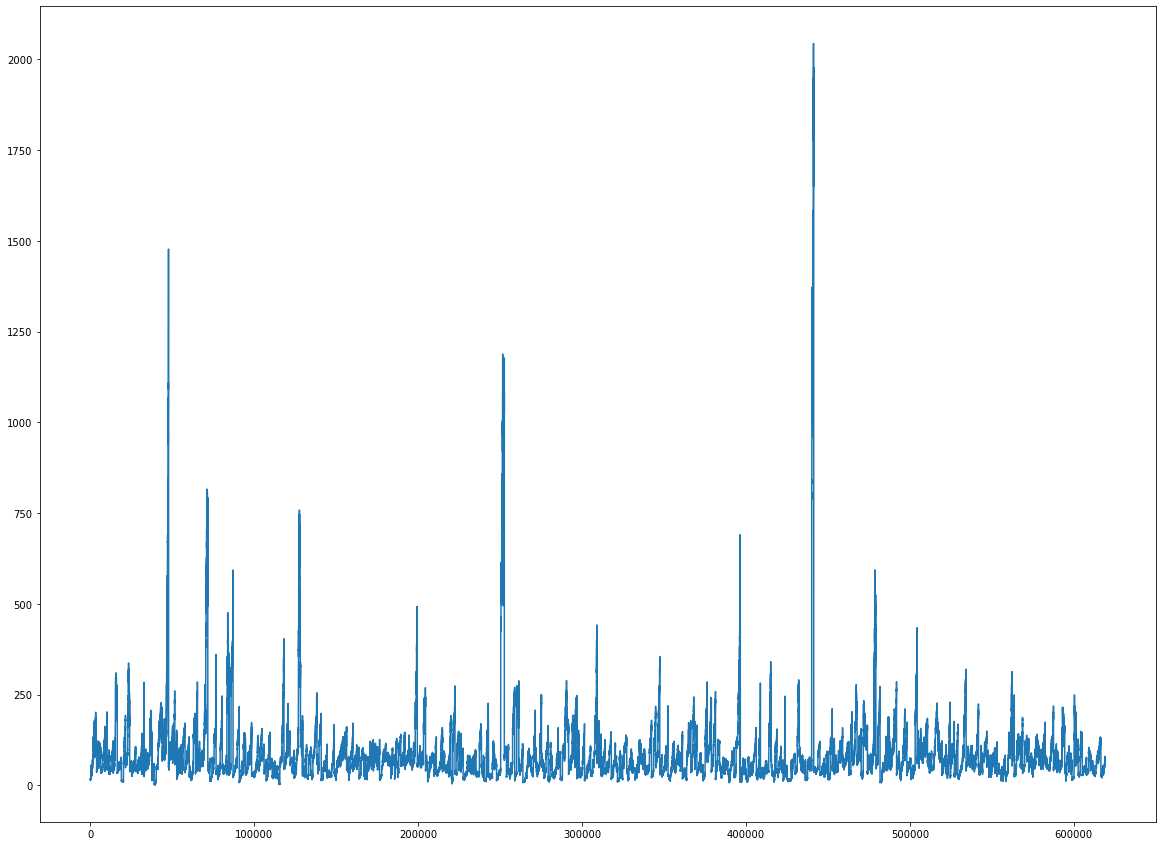

In [22]:
plt.figure(figsize=(20,15))
df['open'].plot()

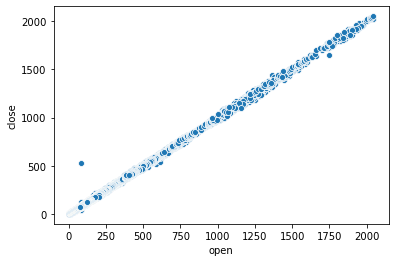

In [23]:
sns.scatterplot(x='open',y='close',data=df)

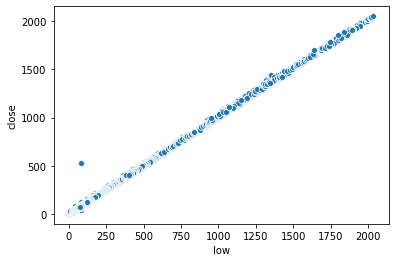

In [24]:
sns.scatterplot(x='low',y='close',data=df)

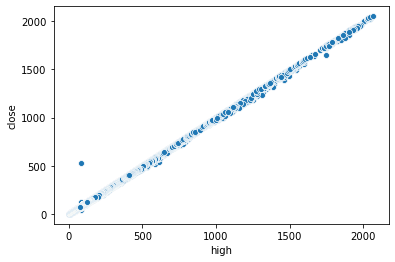

In [25]:
sns.scatterplot(x='high',y='close',data=df)

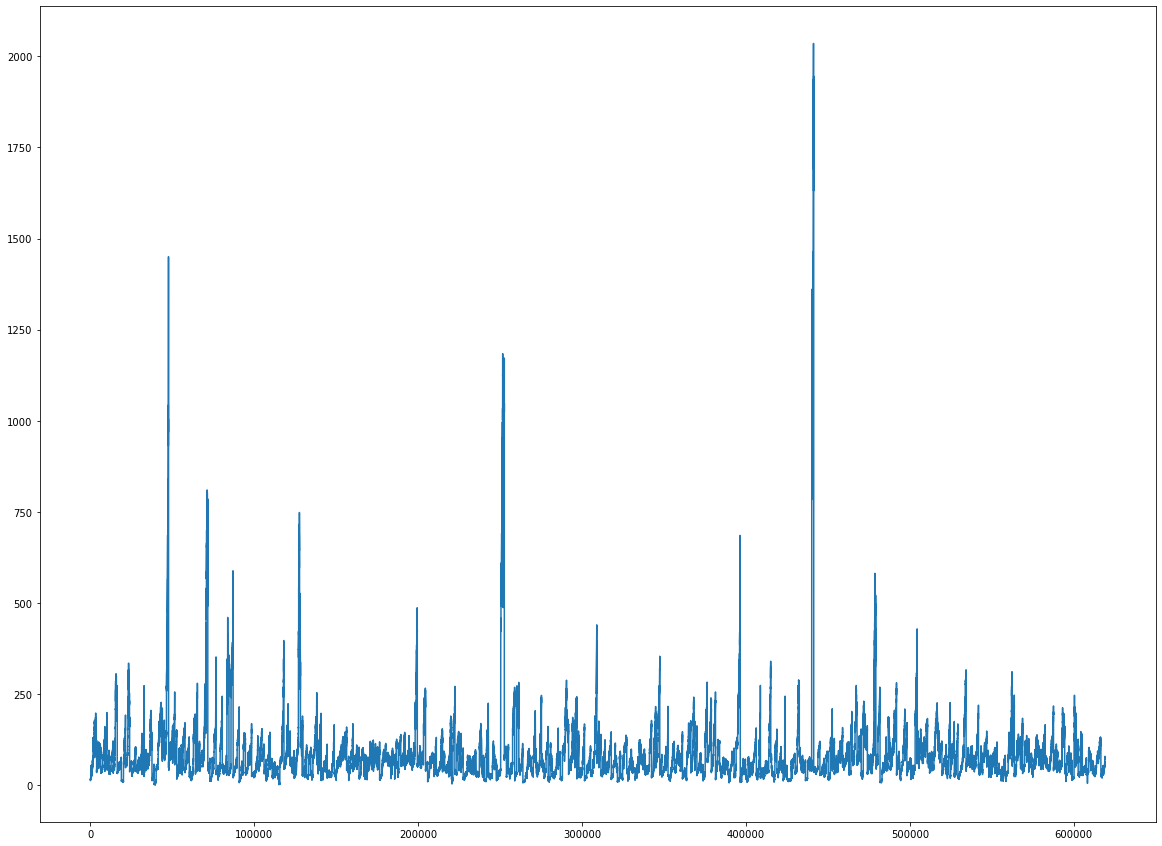

In [26]:
plt.figure(figsize=(20,15))
df['low'].plot()

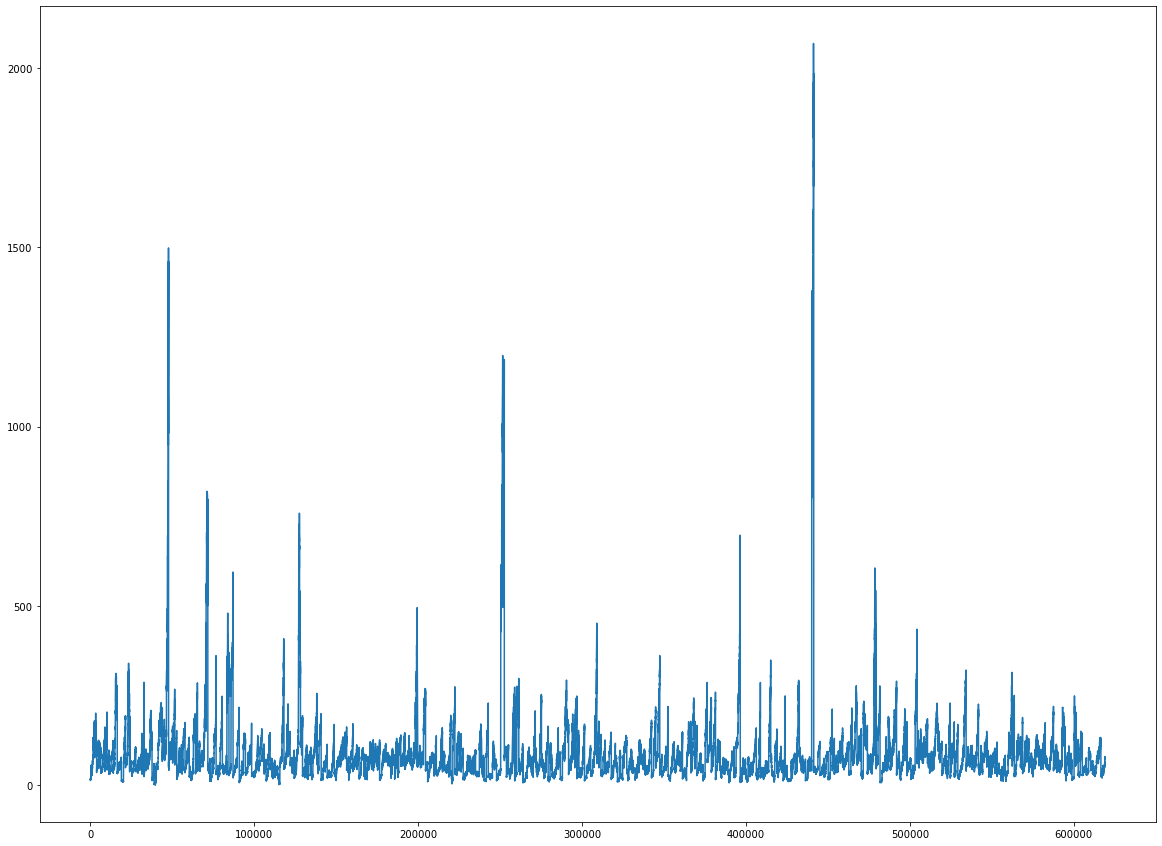

In [27]:
plt.figure(figsize=(20,15))
df['high'].plot()

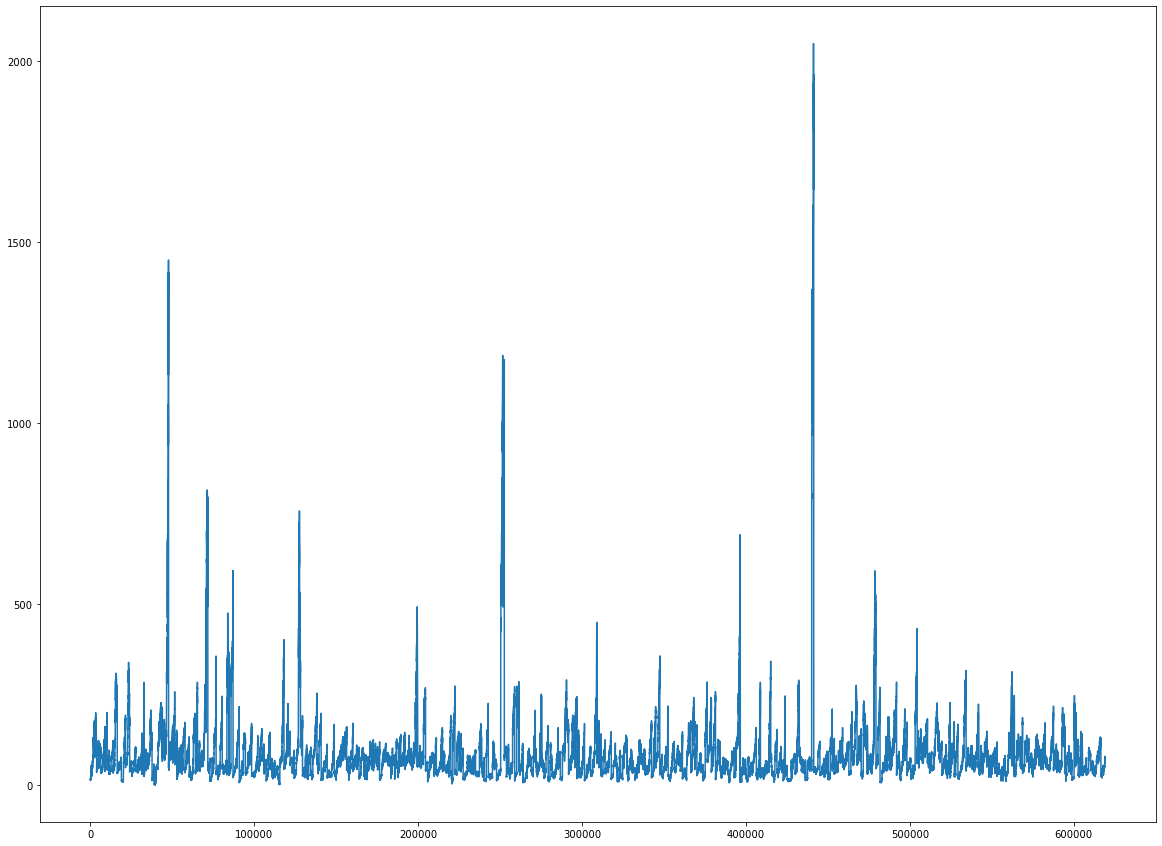

In [28]:
plt.figure(figsize=(20,15))
df['close'].plot()

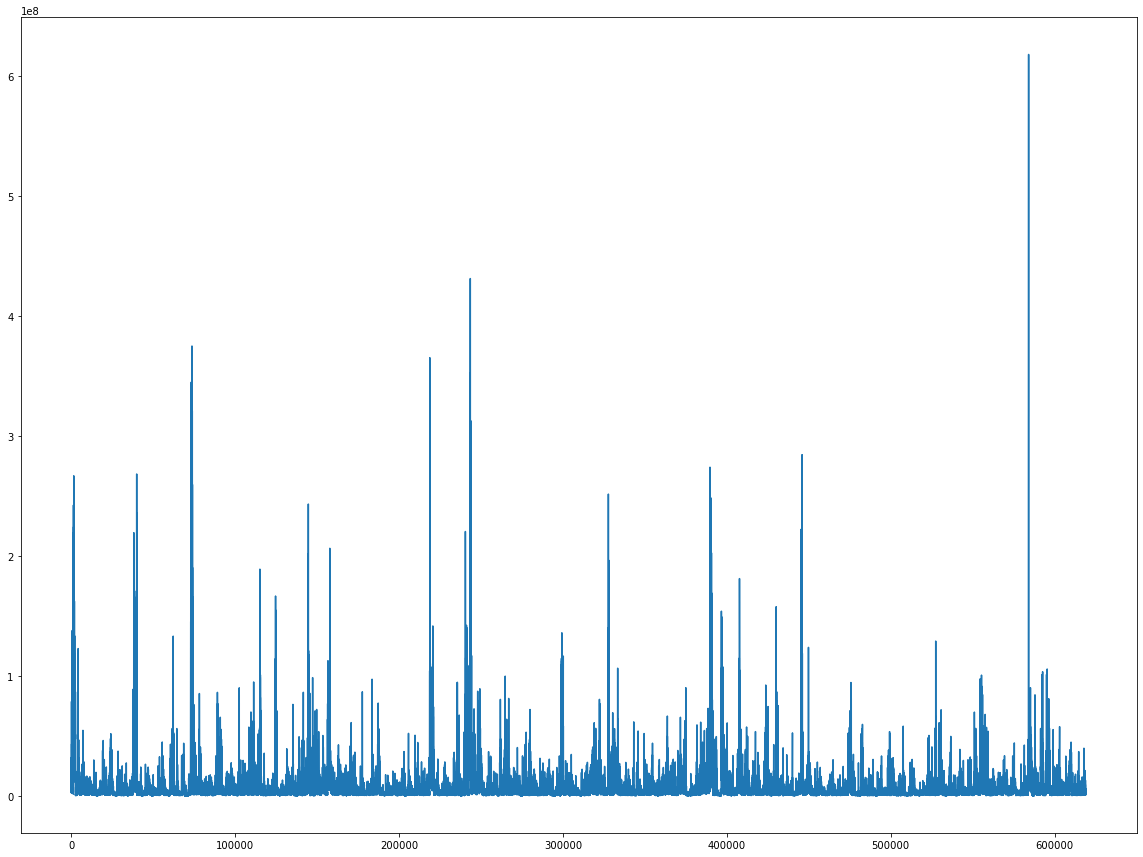

In [29]:
plt.figure(figsize=(20,15))
df['volume'].plot()

Training and Testing Process

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix,mean_absolute_error,mean_squared_error

In [31]:
x=df[['open','low','high','volume']]
y=df['close']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [33]:
x_train.shape

(464280, 4)

In [34]:
y_test.shape

(154760,)

In [35]:
lg=LinearRegression()

In [36]:
lg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
pred=lg.predict(x_test)

In [38]:
pred.shape

(154760,)

In [39]:
predi=pd.DataFrame(y_test,pred)

In [40]:
predict=pd.DataFrame({'Actual':y_test,'Predicted':pred})

In [41]:
predict.head()

,Actual,Predicted
308599,231.9864,232.267529
264277,10.1000,10.153530
600277,140.9000,140.673491
338475,37.9000,37.894332
157253,48.9900,48.988653


In [42]:
print(mean_absolute_error(y_test,pred))

0.33969076792520936


In [43]:
print(mean_squared_error(y_test,pred))

1.7366955993356712


In [44]:
from sklearn import metrics

In [45]:
metrics.explained_variance_score(y_test,pred)

0.9998187705846417